In [ ]:
# importing libraries
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading raw data file
#columns = ['user','activity','timestamp', 'x-axis', 'y-axis', 'z-axis']
df_har = pd.read_csv(r'/content/drive/MyDrive/df_har.csv')

In [ ]:
df_har

,Time,A_X,A_Y,A_Z,Activity,User
0,1.676887e+12,-750.0,1292.0,3768.0,Ideal,1.0
1,1.676887e+12,-744.0,1273.0,3784.0,Ideal,1.0
2,1.676887e+12,-742.0,1319.0,3813.0,Ideal,1.0
3,1.676887e+12,-762.0,1321.0,3738.0,Ideal,1.0
4,1.676887e+12,-770.0,1321.0,3691.0,Ideal,1.0
...,...,...,...,...,...,...
751495,1.679131e+12,-61.0,-1561.0,3671.0,Walking,28.0
751496,1.679131e+12,57.0,-1383.0,3746.0,Walking,28.0
751497,1.679131e+12,210.0,-1073.0,3812.0,Walking,28.0
751498,1.679131e+12,69.0,-1188.0,3787.0,Walking,28.0


In [ ]:
# removing null values
df_har = df_har.dropna()
df_har.shape

(724800, 6)

In [ ]:
df_har['A_X'] = df_har['A_X'].apply(lambda x:float(x))
df_har['A_Y'] = df_har['A_Y'].apply(lambda x:float(x))
df_har['A_Z'] = df_har['A_Z'].apply(lambda x:float(x))

In [ ]:
# drop rows where timestamp is 0
df = df_har[df_har['Time'] != 0]

In [ ]:
# arrange data in ascending order of user and timestamp
df = df.sort_values(by = ['User', 'Time'], ignore_index=True)
df

,Time,A_X,A_Y,A_Z,Activity,User
0,1.676887e+12,-750.0,1292.0,3768.0,Ideal,1.0
1,1.676887e+12,-744.0,1273.0,3784.0,Ideal,1.0
2,1.676887e+12,-742.0,1319.0,3813.0,Ideal,1.0
3,1.676887e+12,-762.0,1321.0,3738.0,Ideal,1.0
4,1.676887e+12,-770.0,1321.0,3691.0,Ideal,1.0
...,...,...,...,...,...,...
724795,1.679131e+12,-61.0,-1561.0,3671.0,Walking,28.0
724796,1.679131e+12,57.0,-1383.0,3746.0,Walking,28.0
724797,1.679131e+12,210.0,-1073.0,3812.0,Walking,28.0
724798,1.679131e+12,69.0,-1188.0,3787.0,Walking,28.0


In [ ]:
df = df_har[df_har['Activity'] != 'Ideal']
df=df.reset_index(drop=True)
df

,Time,A_X,A_Y,A_Z,Activity,User
0,1.676887e+12,-106.0,864.0,3804.0,Sitting,1.0
1,1.676887e+12,-114.0,1070.0,3846.0,Sitting,1.0
2,1.676887e+12,-228.0,808.0,3913.0,Sitting,1.0
3,1.676887e+12,-120.0,663.0,3895.0,Sitting,1.0
4,1.676887e+12,71.0,667.0,3944.0,Sitting,1.0
...,...,...,...,...,...,...
601795,1.679131e+12,-61.0,-1561.0,3671.0,Walking,28.0
601796,1.679131e+12,57.0,-1383.0,3746.0,Walking,28.0
601797,1.679131e+12,210.0,-1073.0,3812.0,Walking,28.0
601798,1.679131e+12,69.0,-1188.0,3787.0,Walking,28.0


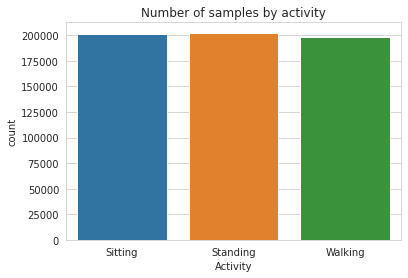

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'Activity', data = df)
plt.title('Number of samples by activity')
plt.show()

In [ ]:
# activities = ['Sitting', 'Standing', 'Walking']
# for i in activities:
#     data36 = df[(df['User'] == '1') & (df['Activity'] == i)]
#     sns.lineplot(y = 'A_X', x = 'Time', data = data36)
#     sns.lineplot(y = 'A_Y', x = 'Time', data = data36)
#     sns.lineplot(y = 'A_Z', x = 'Time', data = data36)
#     plt.legend(['A_X', 'A_Y','A_Z'])
#     plt.ylabel(i)
#     plt.title(i, fontsize = 15)
#     plt.show()

In [ ]:
from scipy import stats
random_seed = 42   
n_time_steps = 125
n_features = 3 
step = 10 
n_classes = 3
n_epochs = 1500      
batch_size = 512   
learning_rate = 0.00015
l2_loss = 0.0015

In [ ]:
segments = []
labels = []

for i in range(0,  df.shape[0]- n_time_steps, step):  

    xs = df['A_X'].values[i: i + 125]

    ys = df['A_Y'].values[i: i + 125]

    zs = df['A_Z'].values[i: i + 125]

    label = stats.mode(df['Activity'][i: i + 125])[0][0]

    segments.append([xs, ys, zs])

    labels.append(label)

#reshape the segments which is (list of arrays) to a list
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, n_time_steps, n_features)

labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

In [ ]:
df.shape[0]

601800

In [ ]:
reshaped_segments.shape

(60168, 125, 3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reshaped_segments, labels, test_size = 0.2, random_state = random_seed)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout
import tensorflow as tf

In [ ]:
model = Sequential()
# RNN layer
model.add(LSTM(units = 128, input_shape = (X_train.shape[1], X_train.shape[2])))
# Dropout layer
model.add(Dropout(0.4)) 
# Dense layer with ReLu
model.add(Dense(units = 64, activation='relu'))
# Softmax layer
model.add(Dense(y_train.shape[1], activation = 'sigmoid'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(
    learning_rate=learning_rate), metrics=['accuracy'])

callback=tf.keras.callbacks.EarlyStopping(patience=100,monitor='val_loss',restore_best_weights=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               67584     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 76,035
Trainable params: 76,035
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs = n_epochs, validation_split = 0.20, batch_size = batch_size, verbose = 1,callbacks=[callback])

Epoch 1/1500
76/76 [==============================] - 10s 29ms/step - loss: 1.0852 - accuracy: 0.4333 - val_loss: 0.9138 - val_accuracy: 0.6058
Epoch 2/1500
76/76 [==============================] - 2s 22ms/step - loss: 0.8852 - accuracy: 0.5870 - val_loss: 0.7569 - val_accuracy: 0.6895
Epoch 3/1500
76/76 [==============================] - 2s 24ms/step - loss: 0.7880 - accuracy: 0.6493 - val_loss: 0.6711 - val_accuracy: 0.7269
Epoch 4/1500
76/76 [==============================] - 2s 22ms/step - loss: 0.7197 - accuracy: 0.6845 - val_loss: 0.6156 - val_accuracy: 0.7571
Epoch 5/1500
76/76 [==============================] - 2s 20ms/step - loss: 0.6807 - accuracy: 0.7038 - val_loss: 0.5832 - val_accuracy: 0.7541
Epoch 6/1500
76/76 [==============================] - 2s 23ms/step - loss: 0.6529 - accuracy: 0.7190 - val_loss: 0.5543 - val_accuracy: 0.7666
Epoch 7/1500
76/76 [==============================] - 2s 30ms/step - loss: 0.6308 - accuracy: 0.7265 - val_loss: 0.5393 - val_accuracy: 0.775

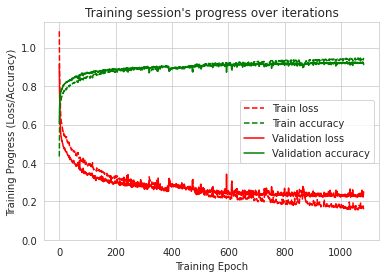

In [ ]:
plt.plot(np.array(history.history['loss']), "r--", label = "Train loss")
plt.plot(np.array(history.history['accuracy']), "g--", label = "Train accuracy")
plt.plot(np.array(history.history['val_loss']), "r-", label = "Validation loss")
plt.plot(np.array(history.history['val_accuracy']), "g-", label = "Validation accuracy")
plt.title("Training session's progress over iterations")
plt.legend(loc='best')
plt.ylabel('Training Progress (Loss/Accuracy)')
plt.xlabel('Training Epoch')
plt.ylim(0) 
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size = batch_size, verbose = 1)
print("Test Accuracy :", accuracy)
print("Test Loss :", loss)

24/24 [==============================] - 0s 11ms/step - loss: 0.2339 - accuracy: 0.9221
Test Accuracy : 0.9220541715621948
Test Loss : 0.23394563794136047


377/377 [==============================] - 4s 6ms/step


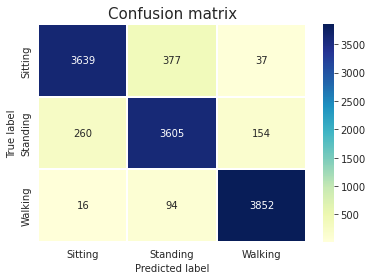

In [ ]:
import sklearn.metrics as metrics
predictions = model.predict(X_test)
class_labels = ['Sitting', 'Standing',  'Walking']
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)
sns.heatmap(confusion_matrix, xticklabels = class_labels, yticklabels = class_labels, annot = True, linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Save the model in the TensorFlow SavedModel format
model.save('cough.h5')

In [ ]:
# Convert the Keras model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_saved_model('cough.h5')
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter.experimental_lower_tensor_list_ops = False
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


OSError: ignored